# Training a Simple Traffic Sign Classifier 

__Objective__: Create a CNN (Convolutional Neural Network) model. Use this model to classify traffic signs.

__Workflow__:
1. Load the `Traffic Sign` dataset and examine its structure.
    - Download `tsrd-train` from http://www.nlpr.ia.ac.cn/pal/trafficdata/recognition.html.
    - Take a closer look at the data inspecting its size, shape, and quantity.
    - View some random samples using either OpenCV or Matplotlib (or others) of the traffic sign images and observe the complexity of the images.
2. Using `numpy` or other libraries, prepare your dataset for training.
    - Ensure the format or shape of the data is appropriate for input into your model (one-hot-encoding is needed for the labels)
    - Ensure data types are correct and that data is normalized. 

__Deliverable__:

The deliverable is a Jupyter Notebook documenting your workflow as you take the `Traffic Sign` dataset, view samples, convert it into the proper shape/format as required by your deep learning library. You are required to train the model using the specifications provided. You should save numpy converted dataset. as you'll need it for further analysis in the second milestone.

In [1]:
# improt librares
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from tqdm.notebook import tqdm
import cv2
from keras.preprocessing.image import  img_to_array
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.patches as patches
from IPython.display import Image

In [2]:
# defintions
IMAGE_PATH_TRAIN = '/Users/ozgur/Downloads/tsrd-train/'
COL_NAMES = ['filename','f1','f2','x1','y1','x2','y2','label']
IMAGE_SIZE = (134,128)

In [3]:
df = pd.read_csv('TsignRecgTrain4170Annotation.txt',names=COL_NAMES,sep=';', index_col=False)

files = glob(IMAGE_PATH_TRAIN + '*.png')
data = []
labels = []

for fname in tqdm(range(len(files)),):
    fname = files[fname]
    image = cv2.imread(fname)
    image = cv2.resize(image, IMAGE_SIZE)
    image = img_to_array(image)
    data.append(image)
    
    label = df.query("filename=='" + os.path.split(fname)[1] + "'").label.values[0]
    labels.append(label)
    
data = np.array(data) / 255.0
labels = to_categorical(labels)

  0%|          | 0/4170 [00:00<?, ?it/s]

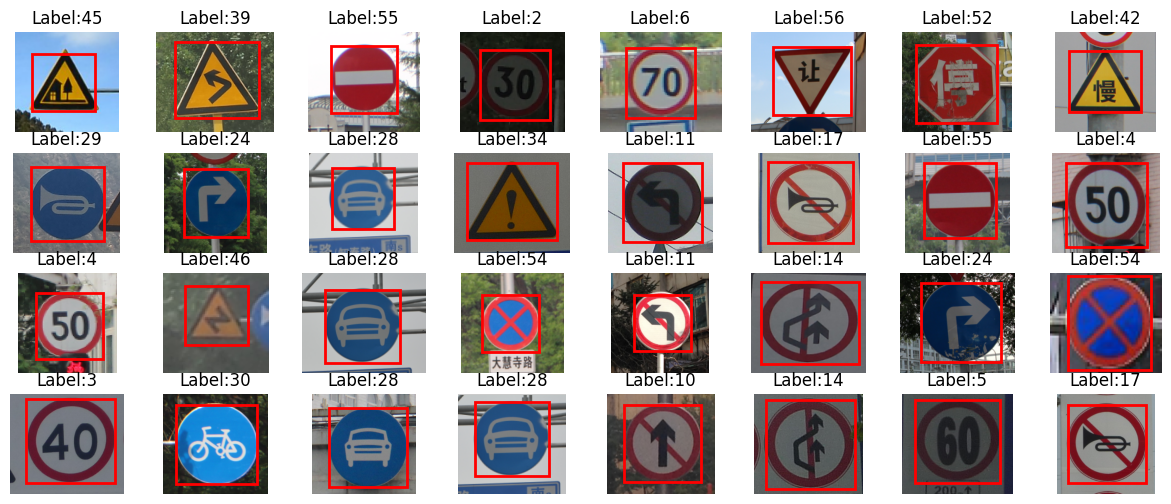

In [4]:
NUM_OF_ROWS = 4
NUM_OF_COLS = 8
fig, ax = plt.subplots(NUM_OF_ROWS,NUM_OF_COLS, figsize=(15,6))

for i in range(NUM_OF_ROWS):
    for j in range(NUM_OF_COLS):
        img_sample = df.sample(1)
        fname = img_sample.filename.values[0]
        image = cv2.imread(IMAGE_PATH_TRAIN + fname)
        image = img_to_array(image)/255.0
        ax[i,j].imshow(image[...,::-1])

        x = img_sample.x1.values[0]
        y = img_sample.y1.values[0]
        width = img_sample.x2.values[0] - img_sample.x1.values[0]
        height = img_sample.y2.values[0] - img_sample.y1.values[0]
        rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax[i,j].add_patch(rect)
        ax[i,j].axis('off')
        ax[i,j].set_title('Label:' + str(img_sample.label.values[0]))
plt.show()

In [5]:
np.savez('traffic_sign.npz', data=data,labels=labels)

$\color{white}{\text{DON"T JUST COPY THIS NOTEBOOK - USE JUST TO CHECK SOLUTION AND THEN SUBMIT YOUR OWN!}}$